In [1]:
%pylab inline

from rayopt import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = System(description="Hubble Space Telescope 2.4m f/24",
          wavelengths=[632.8e-9])
s.object = InfiniteConjugate(angle_deg=154/60**2/2**.5)
s.fields = 0, .7, 1.
start = Spheroid(material=vacuum)
m1 = Spheroid(distance=5e3, material=mirror)
m2 = Spheroid(radius=150., material=mirror)
end = Spheroid()
s.extend([start, m1, m2, end])

# Ritchey-Chrétien telescope
f = 57599.
d = 4906.
b = d + 1500
m1.radius = f/24/2
s.object.pupil.radius = m1.radius
m1.curvature = -(f - b)/(2*d*f)
m2.curvature = (f - d - b)/(2*d*b)
m = (f - b)/d
m1.conic = -1 - 2/m**3*b/d
m2.conic = -1 - 2/(m - 1)**3*(m*(2*m - 1) + b/d)
m2.offset = 0, 0, -d
end.distance = b
end.curvature = 2*(m1.curvature - m2.curvature)  # field curvature
end.curvature *= .96
s.update()

# as built:
# m1.conic = -1.0013236

/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:186: RuntimeWarning: divide by zero encountered in true_divide
  return self.n[(0, -2), ]/(2*na)
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/paraxial_trace.py:191: RuntimeWarning: divide by zero encountered in true_divide
  return 1.22*self.wavelength/(2*na)/self.system.scale
/Users/robincole/anaconda3/lib/python3.5/site-packages/numpy/core/function_base.py:107: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/robincole/anaconda3/lib/python3.5/site-packages/numpy/core/function_base.py:112: RuntimeWarning: invalid value encountered in add
  y += start
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/elements.py:208: RuntimeWarning: invalid value encountered in less_equal
  good = np.square(y[:, :2]).sum(1) <= self.radius**2
/Users/robincole/anaconda3/lib/python3.5/site-packages/rayopt/analysis.py:382: RuntimeWarning: invalid value encountered in true_div

System: Hubble Space Telescope 2.4m f/24
Scale: 1.0 mm
Wavelengths: 633 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 0.0302 deg
 Pupil:
   Pupil Distance: 5000
   Radius: 1199.98
Image:
 Radius: inf
 Update Radius: True
 Pupil:
   Pupil Distance: -7002.43
   Update Radius: True
   Radius: 145.884
Stop: 1
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S          0        inf        inf      basic/vacuum   1.000   1.000     inf
 1 S       5000 -1.104e+04       2400      basic/mirror   1.000   1.000     inf
 2 S       4906       1358        300      basic/mirror   1.000   1.000     inf
 3 S       6406     -629.8        inf              None     nan     nan     nan

lagrange: -0.63351
track length: -4906
object, image height: [  2.63967619  30.40854175]
front, back focal length (from PP): [-57599.  57599.]
entry, exit pupil height: [ 1199.97916667   145.88401764]
entry, exit pupil distance: [  2.66154997e-13  -5.96432847e+02]
front, back focal dis

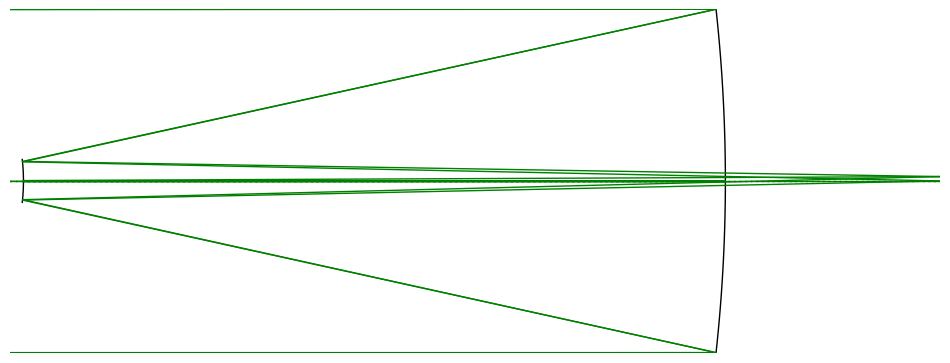

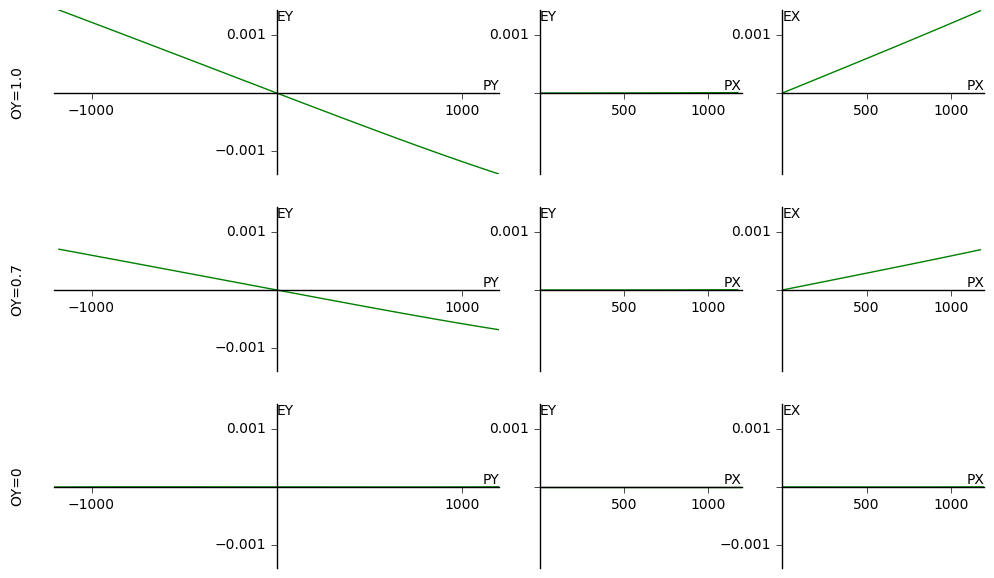

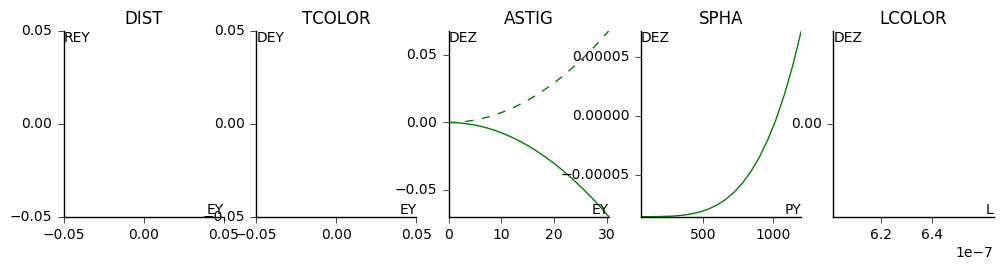

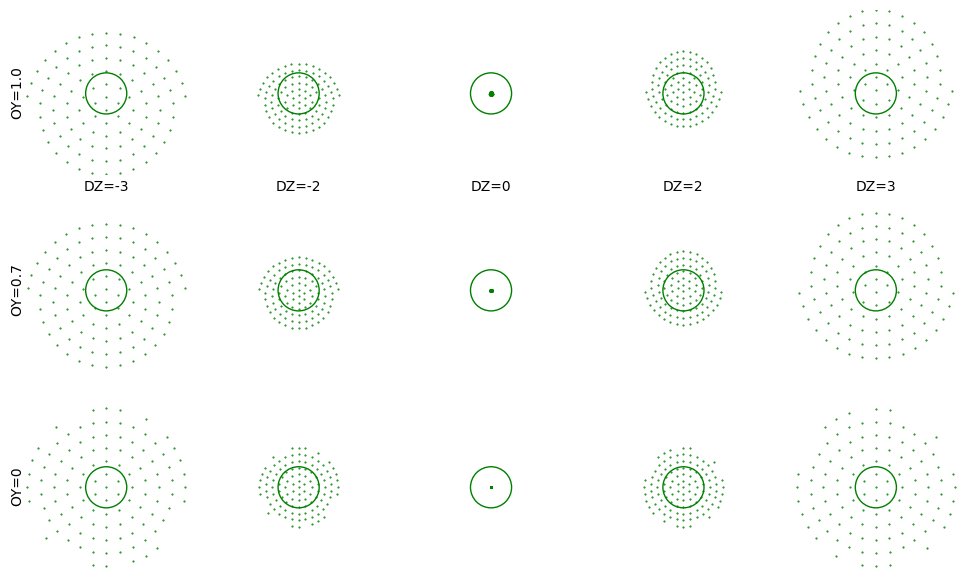

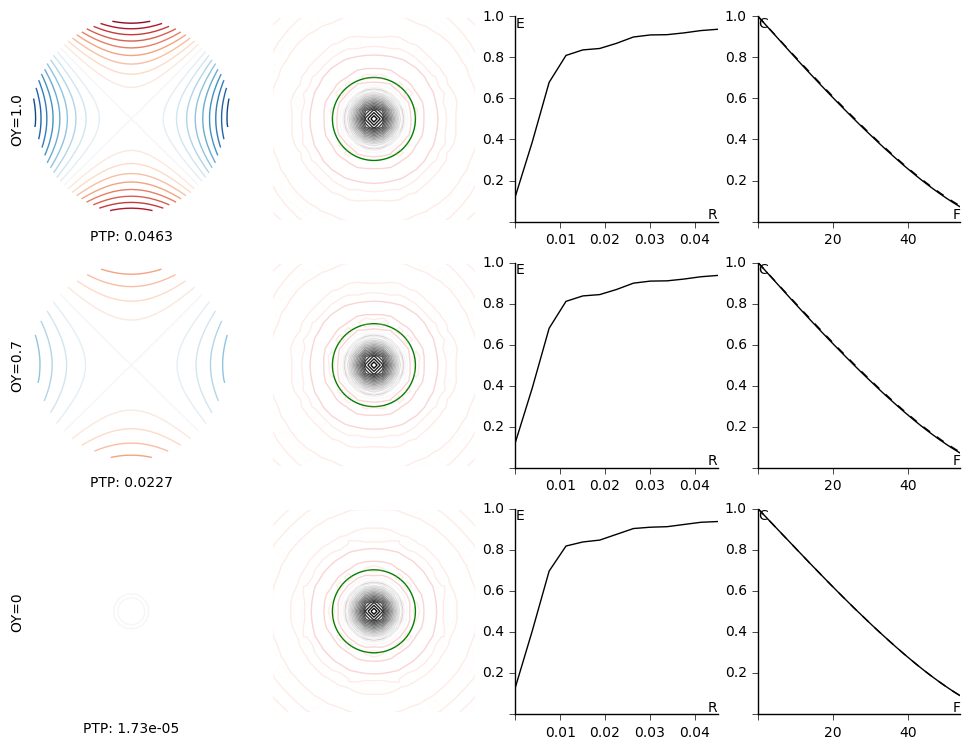

In [3]:
Analysis(s)

In [4]:
p = PolyTrace(s)
print(p)

maximum order: 3
wavelength: 632.8

s1 : -3.76390e-08
s2 : -2.32372e-04
s3 :  5.94610e+00
s4 :  8.52944e+00
s5 :  2.02129e+07
m1 : -2.79512e-16
m2 :  1.74769e-11
m3 :  1.02938e-11
m4 :  3.96351e-05
m5 :  1.30462e-05
m6 :  3.95262e-07
m7 :  4.53348e-01
m8 :  2.24373e-01
m9 : -6.09844e-02
m10:  5.06304e+04
m11:  7.46048e+04
m12:  3.06123e+10

s1100: spherical aberration                 : -3.76390e-08
t1100: sagittal coma                        :  2.32372e-04
s2010: field curvature                      :  1.44755e+01
t2010: distortion                           : -2.02129e+07
s3001: meridional coma                      :  4.64743e-04
t3001: field curvature                      :  1.18922e+01
s4200: spherical aberration                 : -2.79512e-16
t4200: circular coma                        : -7.18309e-12
s5110: sagittal oblique spherical aberration:  1.30462e-05
t5110: meridional elliptical coma           : -2.28974e-01
s6101: circular coma                        : -2.05876e-11
t6101: o